# Karachi AQI Prediction - Exploratory Data Analysis

**Project:** Air Quality Index Prediction for Karachi  
**Author:** Wasifa  
**Date:** January 2026

## Objective
Analyze historical air quality and weather data for Karachi to understand:
- AQI patterns and trends
- Correlation between weather parameters and AQI
- Seasonal variations
- Feature importance for ML models

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Data Loading

Loading real AQI data collected from Karachi.

In [2]:
# Load the actual data we collected
df = pd.read_csv('../data/raw/aqi_raw.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"✅ Dataset loaded: {len(df)} samples")
print(f"📅 Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"🏙️  City: {df['city'].unique()[0].title()}")

✅ Dataset loaded: 2160 samples
📅 Date range: 2025-10-04 13:55:12.767027 to 2026-01-02 12:55:12.767027
🏙️  City: Karachi


## 2. Data Overview

In [3]:
# Display first rows
print("=" * 70)
print("FIRST 10 ROWS")
print("=" * 70)
df.head(10)

FIRST 10 ROWS


,timestamp,city,aqi,pm25,pm10,o3,no2,so2,co,temperature,humidity,pressure,wind_speed
0,2025-10-04 13:55:12.767027,karachi,185,185,278,39,15,5,0.37,32.4,29.7,1013.7,0.8
1,2025-10-04 14:55:12.767027,karachi,160,160,240,44,43,23,1.07,30.7,20.0,1013.5,5.5
2,2025-10-04 15:55:12.767027,karachi,134,134,202,27,10,10,1.22,28.8,20.0,1021.3,6.8
3,2025-10-04 16:55:12.767027,karachi,174,174,261,49,15,12,1.09,31.2,20.0,1014.3,1.1
4,2025-10-04 17:55:12.767027,karachi,191,191,287,64,37,11,1.00,30.6,20.0,1010.4,6.2
5,2025-10-04 18:55:12.767027,karachi,161,161,241,74,35,17,0.57,29.5,20.0,1022.7,1.2
6,2025-10-04 19:55:12.767027,karachi,204,204,307,31,41,11,1.22,28.2,20.0,1009.0,10.3
7,2025-10-04 20:55:12.767027,karachi,216,216,324,28,13,18,1.77,33.8,20.0,1014.3,6.5
8,2025-10-04 21:55:12.767027,karachi,140,140,210,47,46,7,1.33,32.6,20.0,1009.8,7.1
9,2025-10-04 22:55:12.767027,karachi,135,135,203,53,38,13,1.08,25.9,20.0,1013.0,1.6


In [4]:
# Dataset information
print("\n" + "=" * 70)
print("DATASET INFORMATION")
print("=" * 70)
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumn Types:")
print(df.dtypes)


DATASET INFORMATION
Shape: (2160, 13)
Columns: 13
Memory: 0.31 MB

Column Types:
timestamp      datetime64[ns]
city                   object
aqi                     int64
pm25                    int64
pm10                    int64
o3                      int64
no2                     int64
so2                     int64
co                    float64
temperature           float64
humidity              float64
pressure              float64
wind_speed            float64
dtype: object


In [5]:
# Statistical summary
print("=" * 70)
print("STATISTICAL SUMMARY")
print("=" * 70)
df.describe()

STATISTICAL SUMMARY


,timestamp,aqi,pm25,pm10,o3,no2,so2,co,temperature,humidity,pressure,wind_speed
count,2160,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.00000
mean,2025-11-18 13:25:12.767026688,155.798611,155.798611,233.948611,49.208333,29.107407,17.305556,1.165731,31.124537,20.198796,1015.825694,5.16625
min,2025-10-04 13:55:12.767027,62.000000,62.000000,93.000000,20.000000,10.000000,5.000000,0.300000,18.800000,20.000000,998.600000,0.00000
25%,2025-10-27 01:40:12.767026944,127.000000,127.000000,191.000000,34.000000,19.750000,11.000000,0.770000,29.100000,20.000000,1012.300000,3.10000
50%,2025-11-18 13:25:12.767026944,157.000000,157.000000,236.000000,49.000000,29.000000,17.000000,1.170000,31.100000,20.000000,1015.900000,5.10000
75%,2025-12-11 01:10:12.767026944,182.000000,182.000000,273.250000,64.000000,39.000000,23.000000,1.570000,33.100000,20.000000,1019.300000,7.10000
max,2026-01-02 12:55:12.767027,270.000000,270.000000,405.000000,79.000000,49.000000,29.000000,2.000000,41.100000,35.100000,1030.800000,14.50000
std,NaN,37.088851,37.088851,55.625057,17.366926,11.348231,7.145038,0.483853,2.973207,1.197113,5.137978,2.87534


## 3. Data Quality Check

In [6]:
# Check for missing values
print("=" * 70)
print("MISSING VALUES")
print("=" * 70)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage (%)': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

if missing.sum() == 0:
    print("\n✅ No missing values found!")
else:
    print(f"\n⚠️  Total missing values: {missing.sum()}")

MISSING VALUES
Empty DataFrame
Columns: [Missing Count, Percentage (%)]
Index: []

✅ No missing values found!


## 4. AQI Distribution Analysis

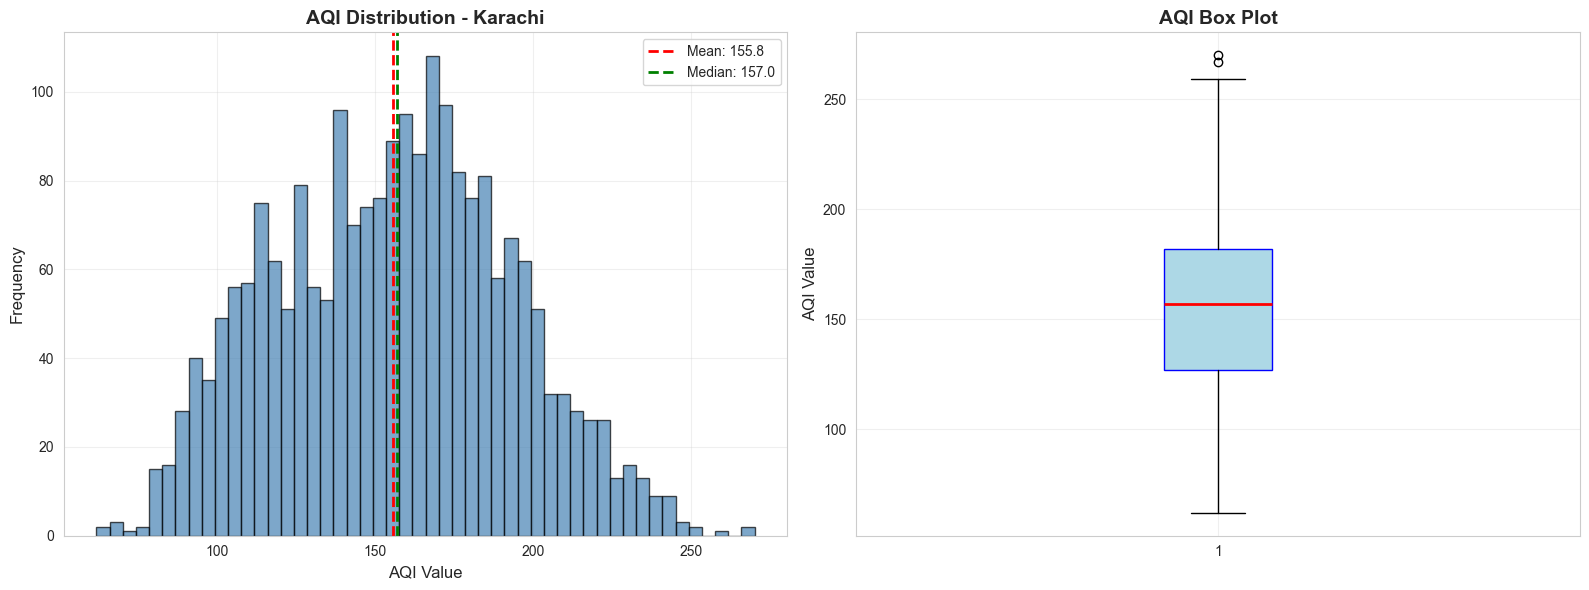

📊 AQI Statistics:
   Average: 155.80
   Median: 157.00
   Std Dev: 37.09
   Min: 62
   Max: 270


In [7]:
# AQI distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(df['aqi'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('AQI Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('AQI Distribution - Karachi', fontsize=14, fontweight='bold')
axes[0].axvline(df['aqi'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["aqi"].mean():.1f}')
axes[0].axvline(df['aqi'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["aqi"].median():.1f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['aqi'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('AQI Value', fontsize=12)
axes[1].set_title('AQI Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 AQI Statistics:")
print(f"   Average: {df['aqi'].mean():.2f}")
print(f"   Median: {df['aqi'].median():.2f}")
print(f"   Std Dev: {df['aqi'].std():.2f}")
print(f"   Min: {df['aqi'].min()}")
print(f"   Max: {df['aqi'].max()}")

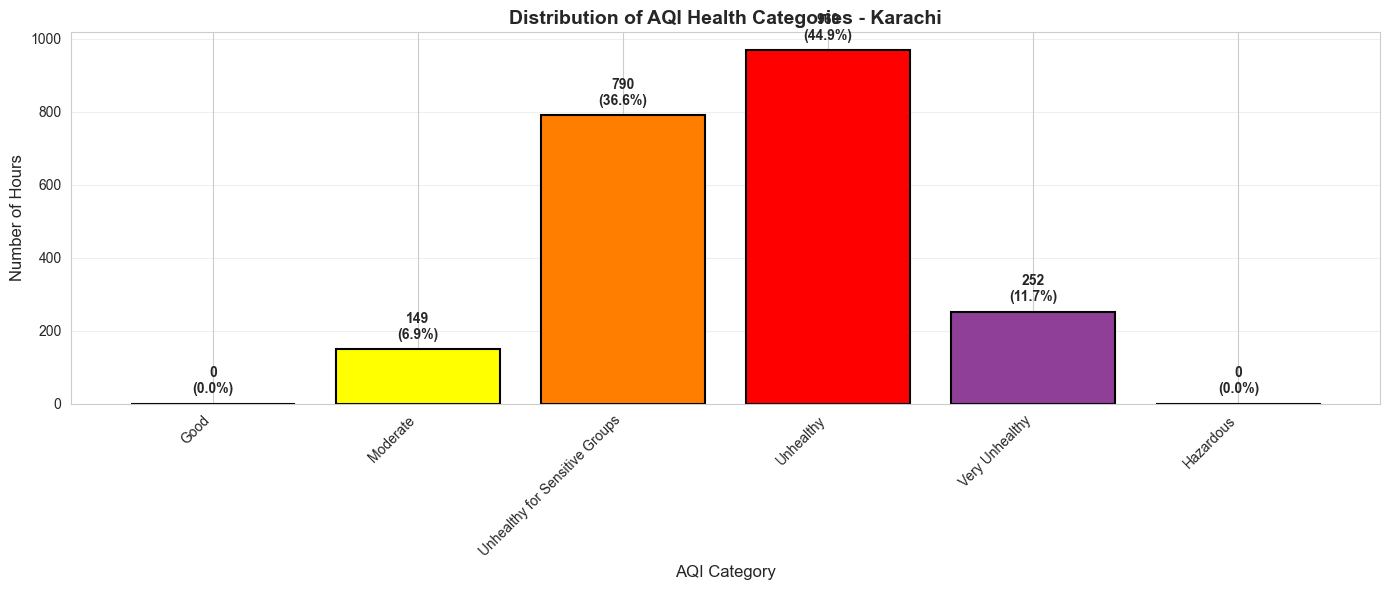


📊 AQI Category Distribution:
   Good: 0 hours (0.00%)
   Moderate: 149 hours (6.90%)
   Unhealthy for Sensitive Groups: 790 hours (36.57%)
   Unhealthy: 969 hours (44.86%)
   Very Unhealthy: 252 hours (11.67%)
   Hazardous: 0 hours (0.00%)

⚠️  56.53% of time AQI is Unhealthy or worse


In [8]:
# AQI Health Categories (EPA Standard)
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['aqi_category'] = df['aqi'].apply(categorize_aqi)

# Plot categories
plt.figure(figsize=(14, 6))
category_counts = df['aqi_category'].value_counts()
colors = ['#00E400', '#FFFF00', '#FF7E00', '#FF0000', '#8F3F97', '#7E0023']
category_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
category_counts = category_counts.reindex(category_order, fill_value=0)

bars = plt.bar(range(len(category_counts)), category_counts.values, 
               color=colors, edgecolor='black', linewidth=1.5)
plt.title('Distribution of AQI Health Categories - Karachi', fontsize=14, fontweight='bold')
plt.xlabel('AQI Category', fontsize=12)
plt.ylabel('Number of Hours', fontsize=12)
plt.xticks(range(len(category_counts)), category_counts.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, category_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             f'{int(value)}\n({value/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 AQI Category Distribution:")
for cat, count in category_counts.items():
    pct = count / len(df) * 100
    print(f"   {cat}: {count} hours ({pct:.2f}%)")

unhealthy_pct = (df['aqi'] > 150).sum() / len(df) * 100
print(f"\n⚠️  {unhealthy_pct:.2f}% of time AQI is Unhealthy or worse")

## 5. Temporal Analysis

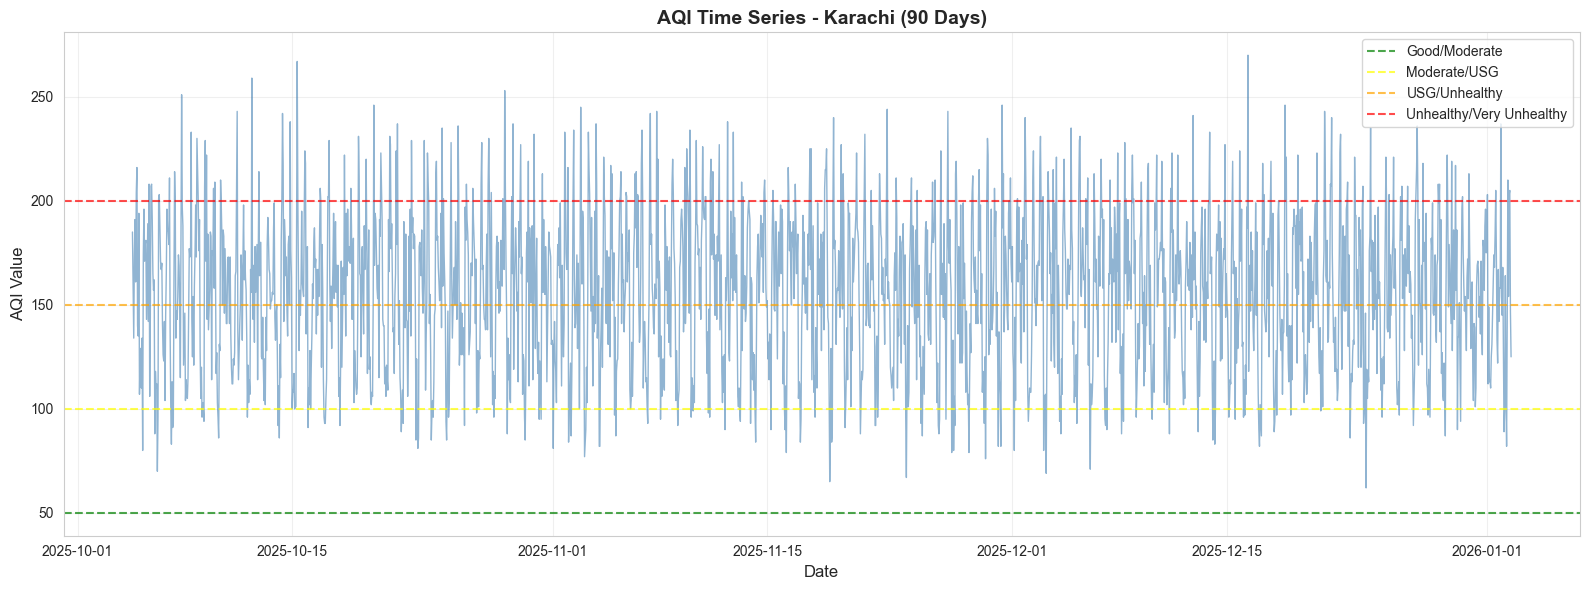

In [9]:
# Time series plot
plt.figure(figsize=(16, 6))
plt.plot(df['timestamp'], df['aqi'], alpha=0.6, linewidth=1, color='steelblue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.title('AQI Time Series - Karachi (90 Days)', fontsize=14, fontweight='bold')
plt.axhline(y=50, color='green', linestyle='--', alpha=0.7, label='Good/Moderate')
plt.axhline(y=100, color='yellow', linestyle='--', alpha=0.7, label='Moderate/USG')
plt.axhline(y=150, color='orange', linestyle='--', alpha=0.7, label='USG/Unhealthy')
plt.axhline(y=200, color='red', linestyle='--', alpha=0.7, label='Unhealthy/Very Unhealthy')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

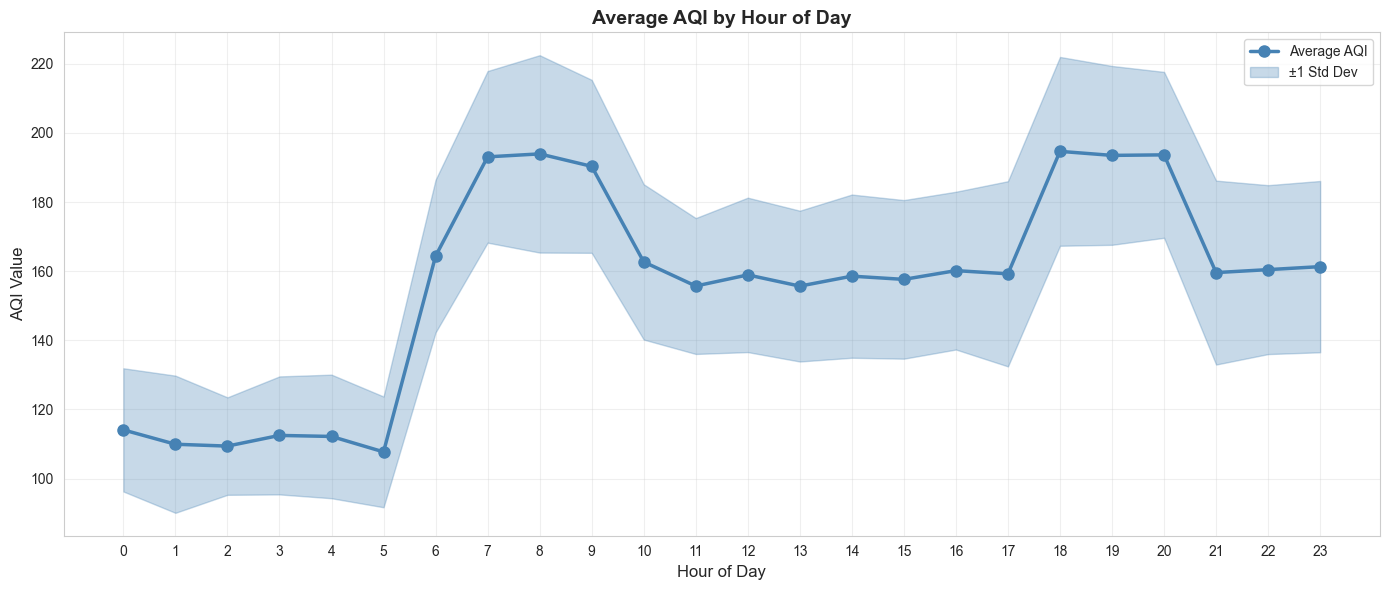

🔴 Highest AQI: 18:00 (Avg: 194.66)
🟢 Lowest AQI: 5:00 (Avg: 107.72)


In [10]:
# Add time features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# Hourly patterns
hourly_stats = df.groupby('hour')['aqi'].agg(['mean', 'std', 'min', 'max'])

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(hourly_stats.index, hourly_stats['mean'], marker='o', linewidth=2.5, 
        markersize=8, color='steelblue', label='Average AQI')
ax.fill_between(hourly_stats.index, 
                hourly_stats['mean'] - hourly_stats['std'],
                hourly_stats['mean'] + hourly_stats['std'],
                alpha=0.3, color='steelblue', label='±1 Std Dev')
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('AQI Value', fontsize=12)
ax.set_title('Average AQI by Hour of Day', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xticks(range(0, 24))
ax.legend()
plt.tight_layout()
plt.show()

peak_hour = hourly_stats['mean'].idxmax()
best_hour = hourly_stats['mean'].idxmin()
print(f"🔴 Highest AQI: {peak_hour}:00 (Avg: {hourly_stats.loc[peak_hour, 'mean']:.2f})")
print(f"🟢 Lowest AQI: {best_hour}:00 (Avg: {hourly_stats.loc[best_hour, 'mean']:.2f})")

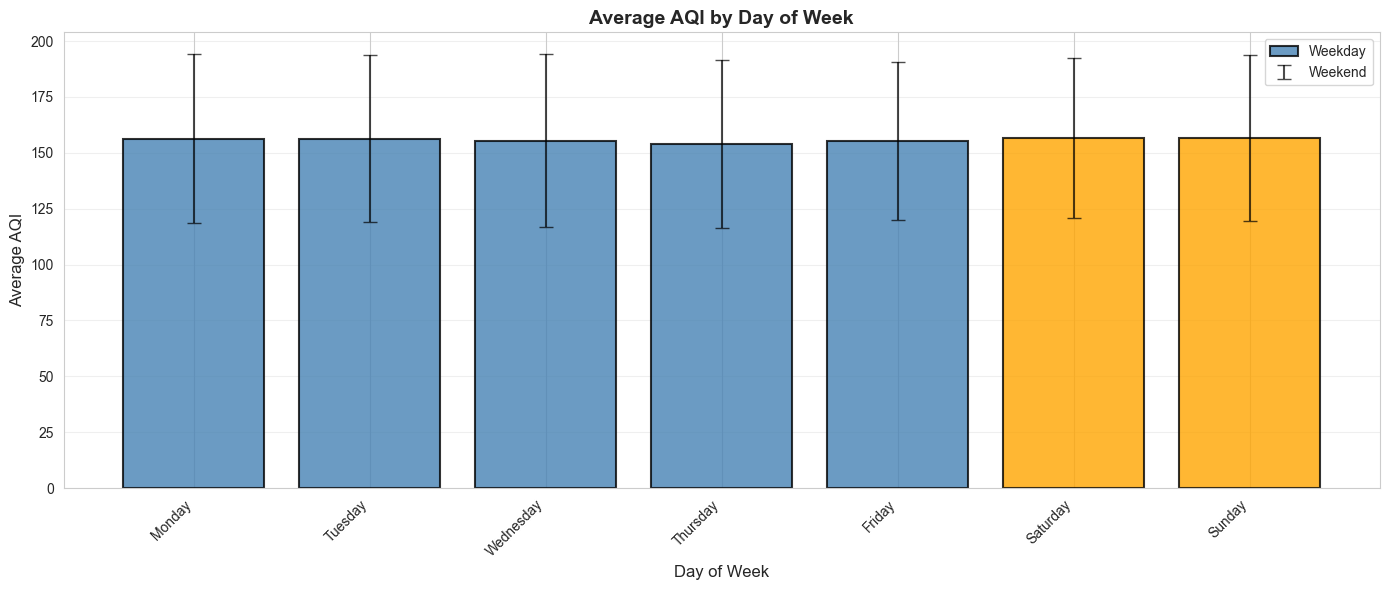


📅 Average AQI by Day:
   Monday: 156.30 (±37.91)
   Tuesday: 156.36 (±37.37)
   Wednesday: 155.51 (±38.50)
   Thursday: 153.76 (±37.56)
   Friday: 155.41 (±35.37)
   Saturday: 156.59 (±35.80)
   Sunday: 156.68 (±37.18)

🏢 Weekday average: 155.47
🏖️  Weekend average: 156.64
   Difference: 1.17 AQI points


In [11]:
# Day of week analysis
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_stats = df.groupby('day_of_week')['aqi'].agg(['mean', 'std'])

fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(range(7), daily_stats['mean'].values, 
              color=['steelblue']*5 + ['orange']*2, 
              edgecolor='black', linewidth=1.5, alpha=0.8)
ax.errorbar(range(7), daily_stats['mean'].values, yerr=daily_stats['std'].values,
            fmt='none', ecolor='black', capsize=5, alpha=0.7)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Average AQI', fontsize=12)
ax.set_title('Average AQI by Day of Week', fontsize=14, fontweight='bold')
ax.set_xticks(range(7))
ax.set_xticklabels(day_names, rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
ax.legend(['Weekday', 'Weekend'], loc='upper right')
plt.tight_layout()
plt.show()

print("\n📅 Average AQI by Day:")
for i, day in enumerate(day_names):
    print(f"   {day}: {daily_stats.loc[i, 'mean']:.2f} (±{daily_stats.loc[i, 'std']:.2f})")

weekday_avg = df[df['day_of_week'] < 5]['aqi'].mean()
weekend_avg = df[df['day_of_week'] >= 5]['aqi'].mean()
print(f"\n🏢 Weekday average: {weekday_avg:.2f}")
print(f"🏖️  Weekend average: {weekend_avg:.2f}")
print(f"   Difference: {abs(weekday_avg - weekend_avg):.2f} AQI points")

## 6. Correlation Analysis

Understanding relationships between weather parameters and AQI.

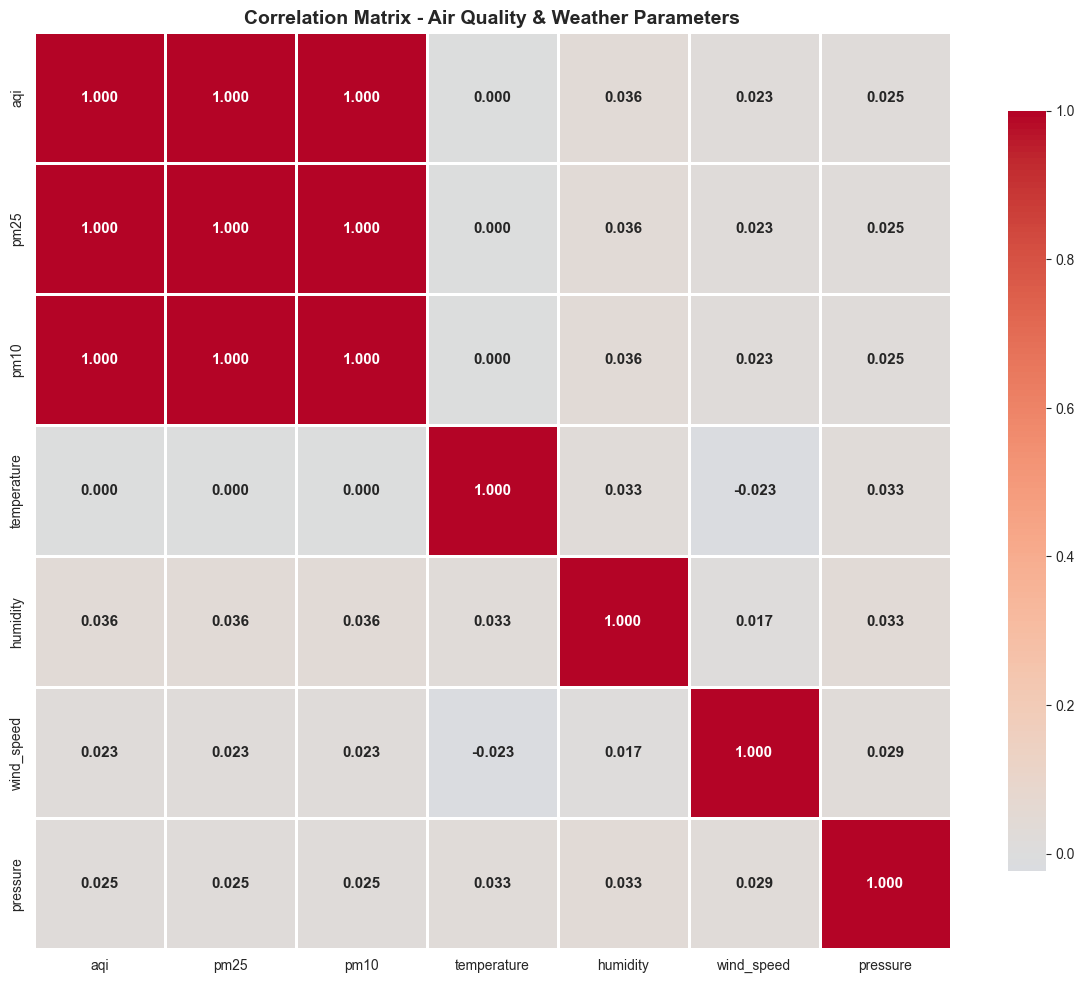


🔍 Correlations with AQI:
   pm25: 1.000 (strong positive)
   pm10: 1.000 (strong positive)
   humidity: 0.036 (weak positive)
   pressure: 0.025 (weak positive)
   wind_speed: 0.023 (weak positive)
   temperature: 0.000 (weak positive)


In [12]:
# Correlation matrix
numerical_cols = ['aqi', 'pm25', 'pm10', 'temperature', 'humidity', 'wind_speed', 'pressure']
# Only include columns that exist
numerical_cols = [col for col in numerical_cols if col in df.columns]
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 11, 'weight': 'bold'})
plt.title('Correlation Matrix - Air Quality & Weather Parameters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 Correlations with AQI:")
aqi_corr = corr_matrix['aqi'].sort_values(ascending=False)[1:]
for param, corr in aqi_corr.items():
    direction = "positive" if corr > 0 else "negative"
    strength = "strong" if abs(corr) > 0.7 else "moderate" if abs(corr) > 0.4 else "weak"
    print(f"   {param}: {corr:.3f} ({strength} {direction})")

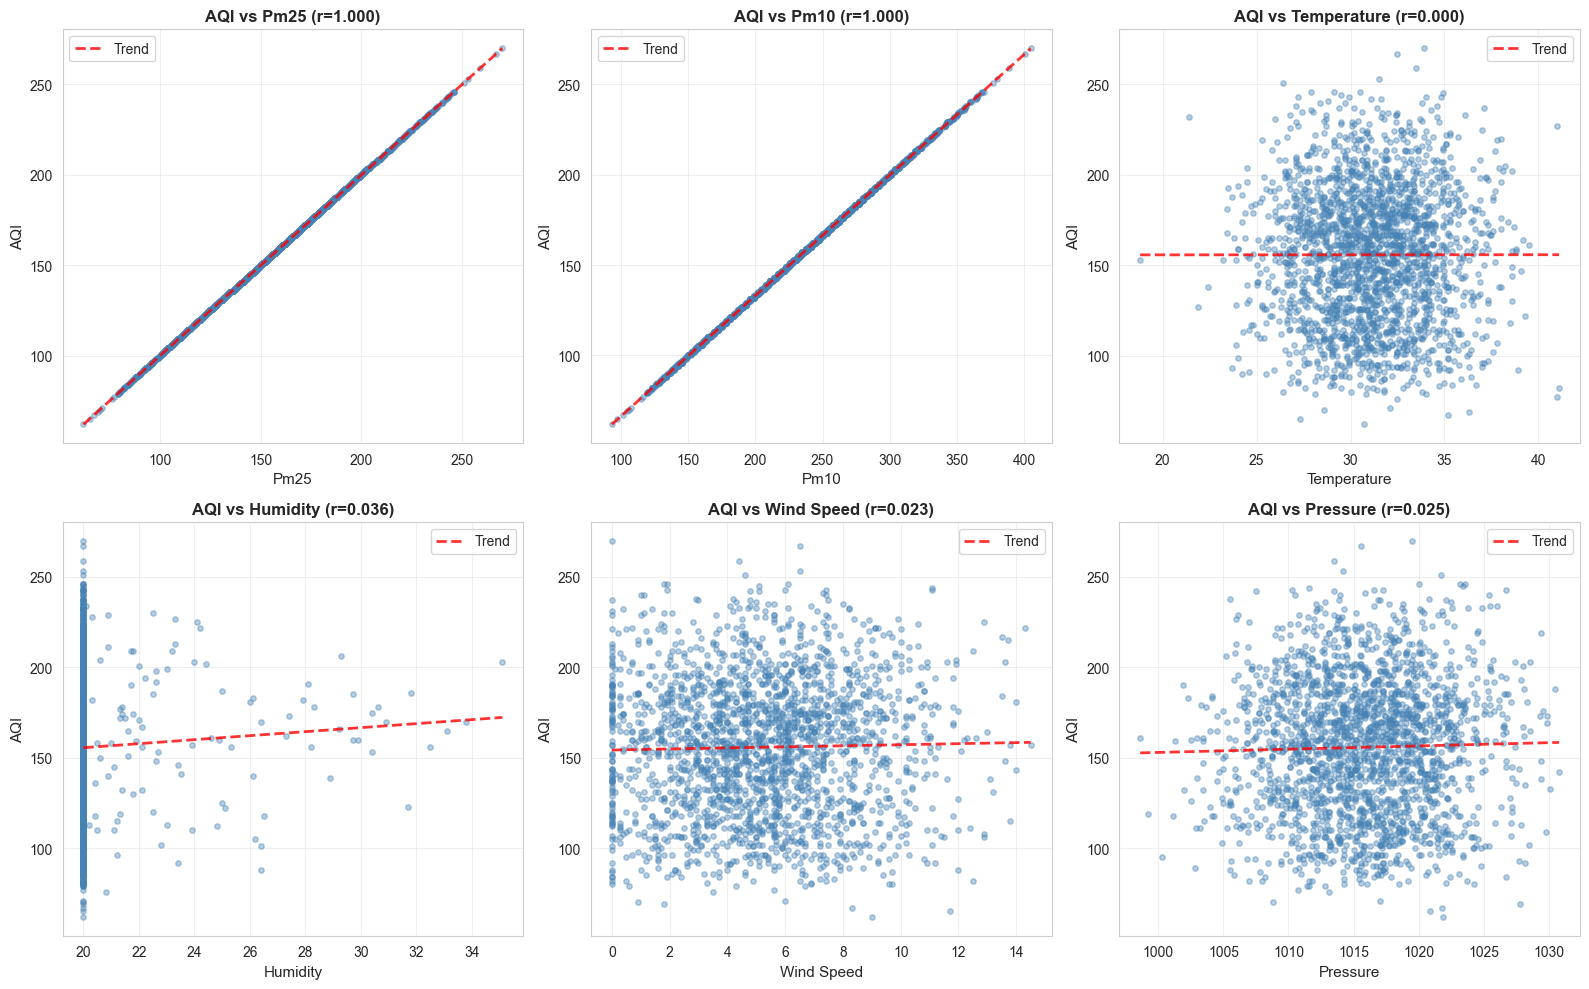

In [13]:
# Scatter plots for key relationships
params_to_plot = [col for col in ['pm25', 'pm10', 'temperature', 'humidity', 'wind_speed', 'pressure'] if col in df.columns]

n_params = len(params_to_plot)
n_rows = (n_params + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(16, n_rows * 5))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for idx, param in enumerate(params_to_plot):
    axes[idx].scatter(df[param], df['aqi'], alpha=0.4, s=15, color='steelblue')
    axes[idx].set_xlabel(param.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_ylabel('AQI', fontsize=11)
    
    # Add trend line
    z = np.polyfit(df[param].dropna(), df.loc[df[param].notna(), 'aqi'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(df[param].min(), df[param].max(), 100)
    axes[idx].plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, label='Trend')
    
    corr = df[[param, 'aqi']].corr().iloc[0, 1]
    axes[idx].set_title(f'AQI vs {param.replace("_", " ").title()} (r={corr:.3f})', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

# Hide empty subplots
for idx in range(len(params_to_plot), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## 7. Pollutant Analysis

PM2.5 and PM10 are primary contributors to AQI.

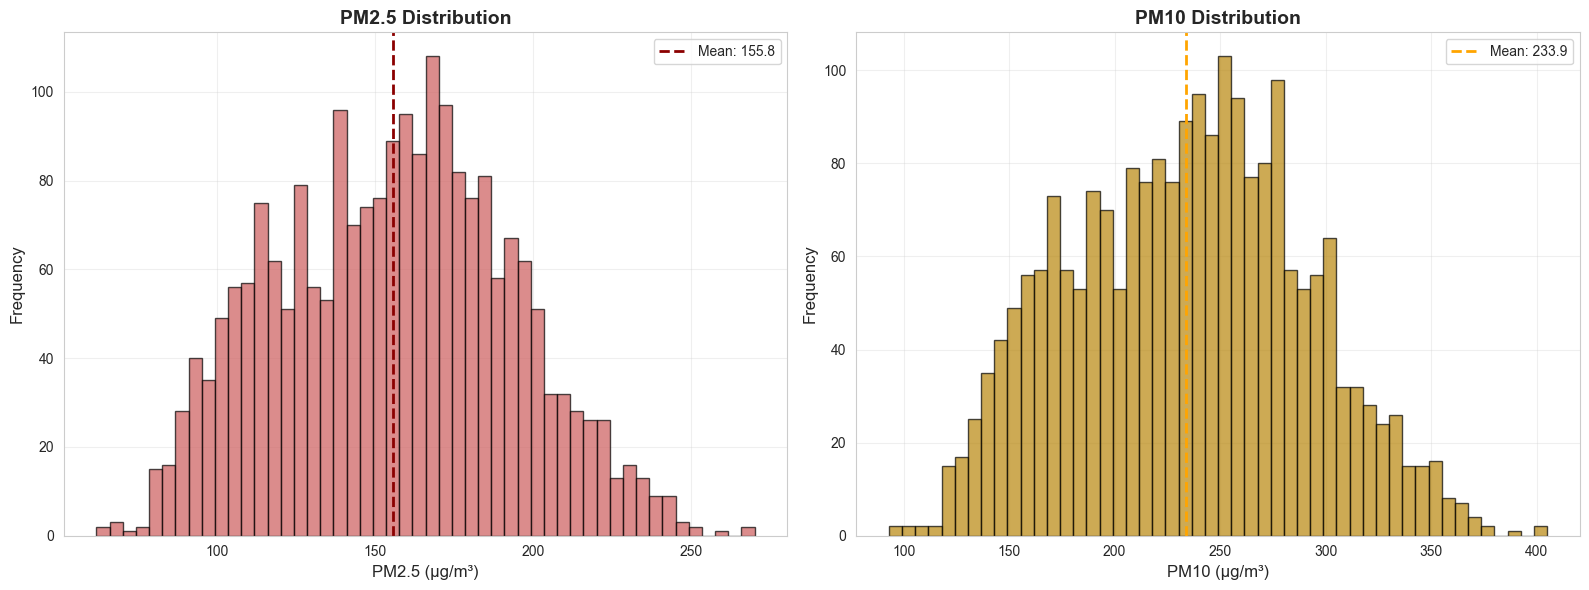

📊 Particulate Matter Statistics:
   PM2.5 - Mean: 155.80, Max: 270.00
   PM10  - Mean: 233.95, Max: 405.00
   PM2.5/PM10 ratio: 0.666


In [14]:
# PM2.5 and PM10 analysis
if 'pm25' in df.columns and 'pm10' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # PM2.5 distribution
    axes[0].hist(df['pm25'], bins=50, color='indianred', edgecolor='black', alpha=0.7)
    axes[0].axvline(df['pm25'].mean(), color='darkred', linestyle='--', linewidth=2, label=f'Mean: {df["pm25"].mean():.1f}')
    axes[0].set_xlabel('PM2.5 (μg/m³)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('PM2.5 Distribution', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # PM10 distribution
    axes[1].hist(df['pm10'], bins=50, color='darkgoldenrod', edgecolor='black', alpha=0.7)
    axes[1].axvline(df['pm10'].mean(), color='orange', linestyle='--', linewidth=2, label=f'Mean: {df["pm10"].mean():.1f}')
    axes[1].set_xlabel('PM10 (μg/m³)', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].set_title('PM10 Distribution', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"📊 Particulate Matter Statistics:")
    print(f"   PM2.5 - Mean: {df['pm25'].mean():.2f}, Max: {df['pm25'].max():.2f}")
    print(f"   PM10  - Mean: {df['pm10'].mean():.2f}, Max: {df['pm10'].max():.2f}")
    print(f"   PM2.5/PM10 ratio: {(df['pm25']/df['pm10']).mean():.3f}")

## 8. Key Insights & Recommendations

In [16]:
print("=" * 70)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 70)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total samples: {len(df):,} hourly readings")
print(f"   • Time period: {(df['timestamp'].max() - df['timestamp'].min()).days} days")
print(f"   • City: Karachi, Pakistan")
print(f"   • Data completeness: {((1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100):.1f}%")

print(f"\n🌫️  AIR QUALITY STATISTICS:")
print(f"   • Average AQI: {df['aqi'].mean():.2f}")
print(f"   • Median AQI: {df['aqi'].median():.2f}")
print(f"   • Range: {df['aqi'].min()} to {df['aqi'].max()}")
print(f"   • Standard deviation: {df['aqi'].std():.2f}")

unhealthy_pct = (df['aqi'] > 150).sum() / len(df) * 100
very_unhealthy_pct = (df['aqi'] > 200).sum() / len(df) * 100
print(f"\n⚠️  HEALTH CONCERNS:")
print(f"   • {unhealthy_pct:.1f}% of time AQI is Unhealthy (>150)")
print(f"   • {very_unhealthy_pct:.1f}% of time AQI is Very Unhealthy (>200)")

if 'pm25' in df.columns:
    print(f"\n🔬 POLLUTANT LEVELS:")
    print(f"   • Average PM2.5: {df['pm25'].mean():.2f} μg/m³")
    print(f"   • Average PM10: {df['pm10'].mean():.2f} μg/m³")

print(f"\n⏰ TEMPORAL PATTERNS:")
hourly_avg = df.groupby('hour')['aqi'].mean()
print(f"   • Peak pollution hour: {hourly_avg.idxmax()}:00 ({hourly_avg.max():.2f} AQI)")
print(f"   • Cleanest hour: {hourly_avg.idxmin()}:00 ({hourly_avg.min():.2f} AQI)")
weekday_avg = df[df['day_of_week'] < 5]['aqi'].mean()
weekend_avg = df[df['day_of_week'] >= 5]['aqi'].mean()
print(f"   • Weekday avg: {weekday_avg:.2f}, Weekend avg: {weekend_avg:.2f}")

if len(numerical_cols) > 1:
    print(f"\n🔗 KEY CORRELATIONS WITH AQI:")
    aqi_corr = corr_matrix['aqi'].sort_values(ascending=False)[1:4]
    for param, corr_val in aqi_corr.items():
        print(f"   • {param}: {corr_val:.3f}")

print(f"\n💡 RECOMMENDATIONS FOR ML MODEL:")
print(f"   • Use temporal features (hour, day, month)")
print(f"   • Include lag features (previous hours' AQI)")
print(f"   • Consider rolling averages")
if 'pm25' in df.columns:
    if corr_matrix.loc['aqi', 'pm25'] > 0.7:
        print(f"   • PM2.5 shows strong correlation - key predictor")
print(f"   • Weather parameters provide additional signal")

print("\n" + "=" * 70)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

📊 DATASET OVERVIEW:
   • Total samples: 2,160 hourly readings
   • Time period: 89 days
   • City: Karachi, Pakistan
   • Data completeness: 100.0%

🌫️  AIR QUALITY STATISTICS:
   • Average AQI: 155.80
   • Median AQI: 157.00
   • Range: 62 to 270
   • Standard deviation: 37.09

⚠️  HEALTH CONCERNS:
   • 56.5% of time AQI is Unhealthy (>150)
   • 11.7% of time AQI is Very Unhealthy (>200)

🔬 POLLUTANT LEVELS:
   • Average PM2.5: 155.80 μg/m³
   • Average PM10: 233.95 μg/m³

⏰ TEMPORAL PATTERNS:
   • Peak pollution hour: 18:00 (194.66 AQI)
   • Cleanest hour: 5:00 (107.72 AQI)
   • Weekday avg: 155.47, Weekend avg: 156.64

🔗 KEY CORRELATIONS WITH AQI:
   • pm25: 1.000
   • pm10: 1.000
   • humidity: 0.036

💡 RECOMMENDATIONS FOR ML MODEL:
   • Use temporal features (hour, day, month)
   • Include lag features (previous hours' AQI)
   • Consider rolling averages
   • PM2.5 shows strong correlation - key predictor
   • Weather parameters provide